In [14]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader
from torchsummary import summary
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sb
from torchvision import utils
from sklearn.metrics import classification_report
import torchvision

In [5]:
train_mnist = datasets.MNIST(r'C:\Users\777\PycharmProjects\uchuneyronki\PATH_TO_STORE_TESTSET\MNIST', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
test_mnist = datasets.MNIST(r'C:\Users\777\PycharmProjects\uchuneyronki\PATH_TO_STORE_TESTSET\MNIST', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

# Параметры обучения FCN MLP

In [3]:
num_epochs = 10
batch_size = 32
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [7]:
train_dataloader = DataLoader(train_mnist, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_mnist, batch_size=batch_size, shuffle=False)

In [5]:
for data in train_dataloader:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Батч из 32ух пар тензоров, где в первые-яркости пикселей, а вторые- метки

In [6]:
print('Количество картинок в обучающей выборке:', sum([1 for data in train_mnist]))
print('Количество картинок в тестовой выборке:', sum([1 for data in test_mnist]))

Количество картинок в обучающей выборке: 60000
Количество картинок в тестовой выборке: 10000


In [7]:
X, y = data[0][0], data[1][0]

In [8]:
print(X, y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Text(0.5, 1.0, '9')

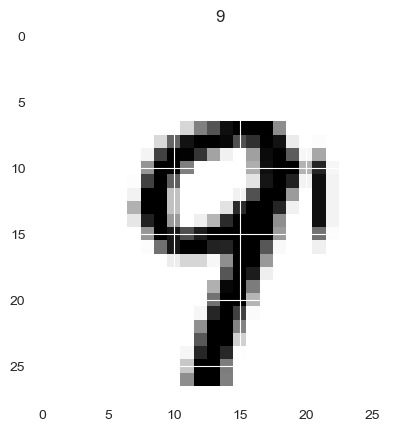

In [9]:
plt.imshow(X.view(28, 28), cmap='gray_r')
plt.title(int(y))

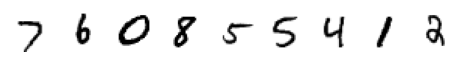

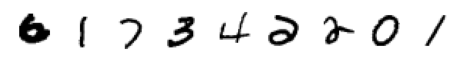

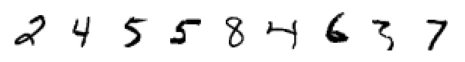

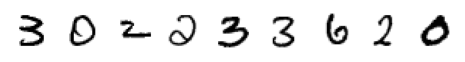

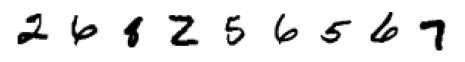

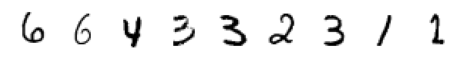

In [10]:
for _ in range(6):
    images, labels = next(iter(train_dataloader))
    figure = plt.figure()
    for index in range(1, 10):
        plt.subplot(1, 10, index)
        plt.axis('off')
        plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Процентоное соотношение цифры 0 от общего кол-ва цифр: 9.871666666666666%
Процентоное соотношение цифры 1 от общего кол-ва цифр: 11.236666666666666%
Процентоное соотношение цифры 2 от общего кол-ва цифр: 9.93%
Процентоное соотношение цифры 3 от общего кол-ва цифр: 10.218333333333334%
Процентоное соотношение цифры 4 от общего кол-ва цифр: 9.736666666666666%
Процентоное соотношение цифры 5 от общего кол-ва цифр: 9.035%
Процентоное соотношение цифры 6 от общего кол-ва цифр: 9.863333333333333%
Процентоное соотношение цифры 7 от общего кол-ва цифр: 10.441666666666666%
Процентоное соотношение цифры 8 от общего кол-ва цифр: 9.751666666666667%
Процентоное соотношение цифры 9 от общего кол-ва цифр: 9.915%


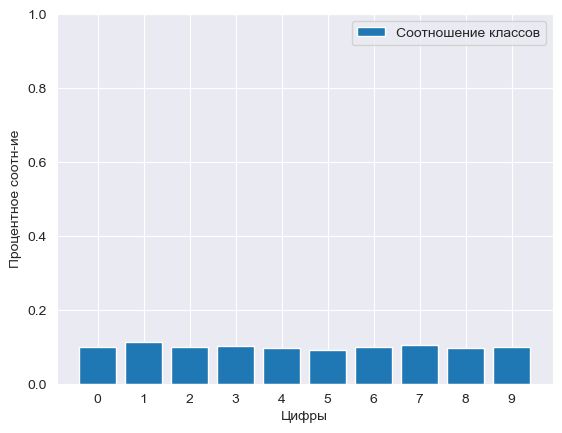

In [11]:
total = 0
dic_count = {int(i): 0 for i in range(10)}
for dat in train_dataloader:
    tens, mark = dat
    for y in mark:
        dic_count[int(y)] += 1
        total += 1
print(dic_count)
for k, v in dic_count.items():
    print(f'Процентоное соотношение цифры {k} от общего кол-ва цифр: {v*100/total}%')
keys = dic_count.keys()
vals = dic_count.values()
plt.bar(keys, np.divide(list(vals), sum(vals)), label="Соотношение классов")
plt.ylim(0,1)
plt.ylabel("Процентное соотн-ие")
plt.xlabel("Цифры")
plt.xticks(list(keys))
plt.legend()
plt.show()

Так как набор данных предварительно обработан, то наблюдаем сбалансированность данных, следовательно прибегать к дополнительным методам не придется

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation=nn.ReLU()):
        super().__init__()
        self.flatten = nn.Flatten()
        self.activation = activation
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            self.activation,
            nn.Linear(512, 256),
            self.activation,
            nn.Linear(256, 128),
            self.activation,
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

In [13]:
model = NeuralNetwork().to(device)

In [14]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
              ReLU-4                  [-1, 512]               0
            Linear-5                  [-1, 256]         131,328
              ReLU-6                  [-1, 256]               0
              ReLU-7                  [-1, 256]               0
            Linear-8                  [-1, 128]          32,896
              ReLU-9                  [-1, 128]               0
             ReLU-10                  [-1, 128]               0
           Linear-11                   [-1, 10]           1,290
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

Архитектура ИНС имеет следующий вид: 784 входа, которые равны количеству пикселей в изображении, 3 скрытых слоя по 512, 256 и 128 нейронов соответственно. В качестве функции активации используется ReLU, которая имеет вид
![image](ReLUpic.jpg)
Всего в модели 567434 рассчитываемых параметров

In [15]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
def train_loop(dataloader, model, loss_function, optimizer):
    global cortrain
    num_batches = len(dataloader)

    train_loss, corr_train = 0, 0
    cortrain = []
    for imgs, labels in dataloader:
        # предсказание и расчет потерь
        pred = model(imgs.to(device))
        loss = loss_function(pred, labels.to(device))

        # оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        corr_train += (
                (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
            )
    cortrain = corr_train* 100
    train_loss /= num_batches
    print(f"Потери обучения: {train_loss:>8f}")

    return train_loss


def test_loop(dataloader, model, loss_function):
    global cortest
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0
    cortest = []
    with torch.no_grad():
        for imgs, labels in dataloader:
            # Compute prediction and loss
            pred = model(imgs.to(device))
            loss = loss_function(pred, labels.to(device))

            test_loss += loss.item()
            correct += (
                (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
            )
    cortest = correct * 100
    test_loss /= num_batches
    correct /= size
    print(f"Потери на тестовых данных: {test_loss:>8f}, Точность модели на тестовых данных: {(100*correct):>0.1f}% \n")

    return test_loss

In [17]:
# обучение модели и построение графика обучения
loss_history = {"train": [], "test": []}
start_time = time.time()
num_epochs = 60
cor_test = []
cor_train = []
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)
    cor_test.append(cortest)
    cor_train.append(cortrain)
    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 2.298078
Потери на тестовых данных: 2.290901, Точность модели на тестовых данных: 16.4% 

Эпоха номер 2
Потери обучения: 2.282461
Потери на тестовых данных: 2.270638, Точность модели на тестовых данных: 24.5% 

Эпоха номер 3
Потери обучения: 2.254549
Потери на тестовых данных: 2.230729, Точность модели на тестовых данных: 54.6% 

Эпоха номер 4
Потери обучения: 2.192866
Потери на тестовых данных: 2.133551, Точность модели на тестовых данных: 57.8% 

Эпоха номер 5
Потери обучения: 2.018131
Потери на тестовых данных: 1.836125, Точность модели на тестовых данных: 59.0% 

Эпоха номер 6
Потери обучения: 1.559376
Потери на тестовых данных: 1.250151, Точность модели на тестовых данных: 69.3% 

Эпоха номер 7
Потери обучения: 1.056625
Потери на тестовых данных: 0.883603, Точность модели на тестовых данных: 75.4% 

Эпоха номер 8
Потери обучения: 0.810678
Потери на тестовых данных: 0.718059, Точность модели на тестовых данных: 78.8% 

Эпоха номер 9
Потери обучения: 0

In [18]:
cor_test_g = [x / 10000 for x in cor_test]
cor_train_g = [x / 60000 for x in cor_train]

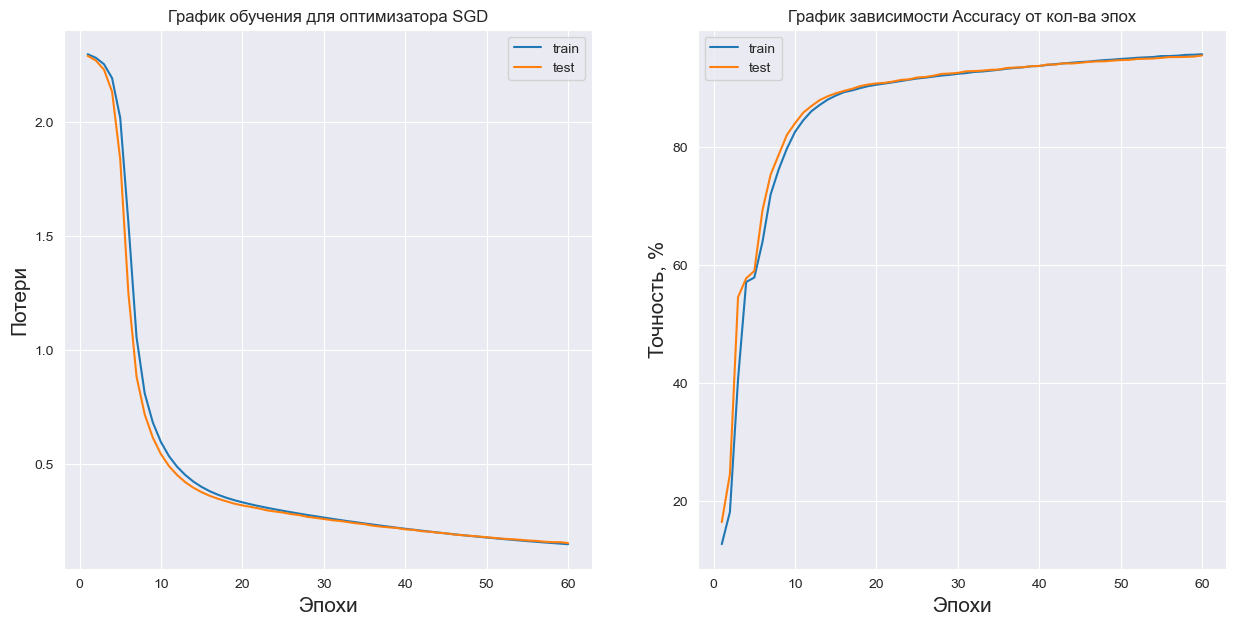

In [19]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График обучения для оптимизатора SGD")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), cor_train_g, label="train")
plt.plot(range(1, num_epochs + 1), cor_test_g, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.grid
plt.show()

In [28]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation=nn.ReLU()):
        super().__init__()
        self.flatten = nn.Flatten()
        self.activation = activation
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            self.activation,
            nn.Linear(512, 256),
            self.activation,
            nn.Linear(256, 128),
            self.activation,
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

In [29]:
model = NeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
loss_history = {"train": [], "test": []}
start_time = time.time()
num_epochs = 7
learning_rate = 0.001
cor_test = []
cor_train = []
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)
    cor_test.append(cortest)
    cor_train.append(cortrain)
    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 0.231918
Потери на тестовых данных: 0.113532, Точность модели на тестовых данных: 96.6% 

Эпоха номер 2
Потери обучения: 0.091096
Потери на тестовых данных: 0.107263, Точность модели на тестовых данных: 96.8% 

Эпоха номер 3
Потери обучения: 0.065408
Потери на тестовых данных: 0.094150, Точность модели на тестовых данных: 97.5% 

Эпоха номер 4
Потери обучения: 0.050398
Потери на тестовых данных: 0.077244, Точность модели на тестовых данных: 97.9% 

Эпоха номер 5
Потери обучения: 0.037674
Потери на тестовых данных: 0.069123, Точность модели на тестовых данных: 98.1% 

Эпоха номер 6
Потери обучения: 0.033032
Потери на тестовых данных: 0.079921, Точность модели на тестовых данных: 98.1% 

Эпоха номер 7
Потери обучения: 0.029043
Потери на тестовых данных: 0.084837, Точность модели на тестовых данных: 98.0% 

Обучение завершнео за 7 эпох, затраченное время: 42.273 секунд


In [31]:
cor_test_g = [x / 10000 for x in cor_test]
cor_train_g = [x / 60000 for x in cor_train]

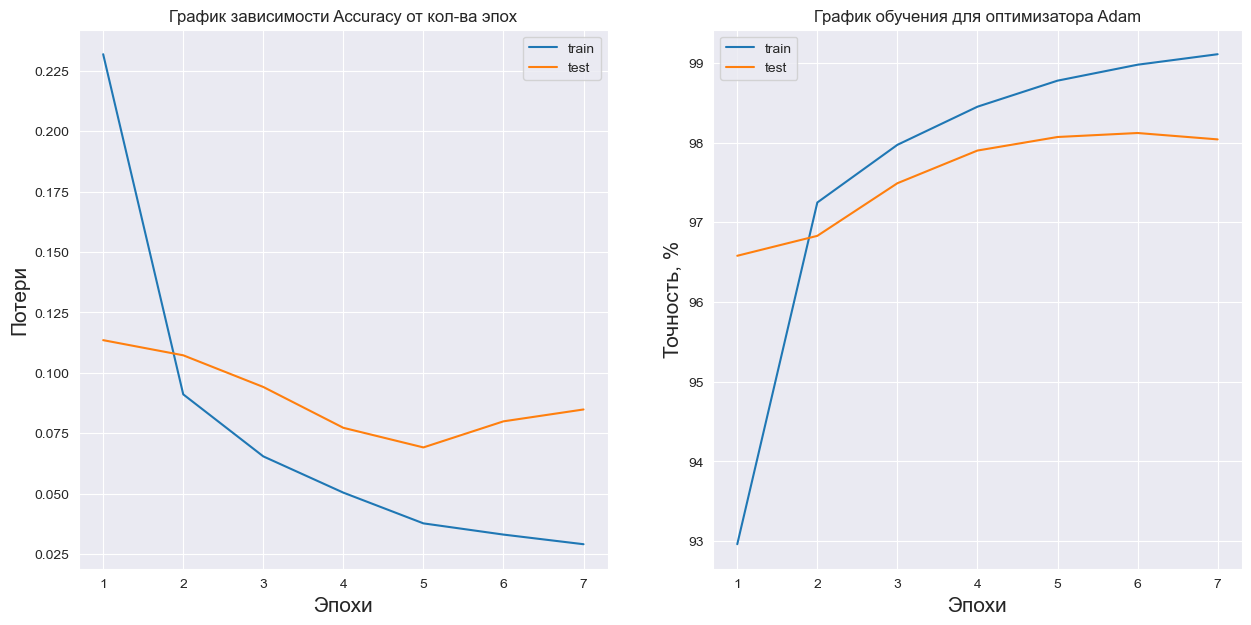

In [32]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), cor_train_g, label="train")
plt.plot(range(1, num_epochs + 1), cor_test_g, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График обучения для оптимизатора Adam")
plt.grid
plt.show()

Используя оптимизатор Adam модель обучается быстрее и требует меньших вычислительных мощностей. В обоих случаях точность модели очень высокая.

In [33]:
imgs, labels = next(iter(test_dataloader))
pred = model(imgs.to(device))
imgs = torch.reshape(imgs, (32, 28, 28))
imgs = imgs[:32]
pred = pred[:32].detach()
digits = np.argmax(pred.cpu().numpy(), axis=1)

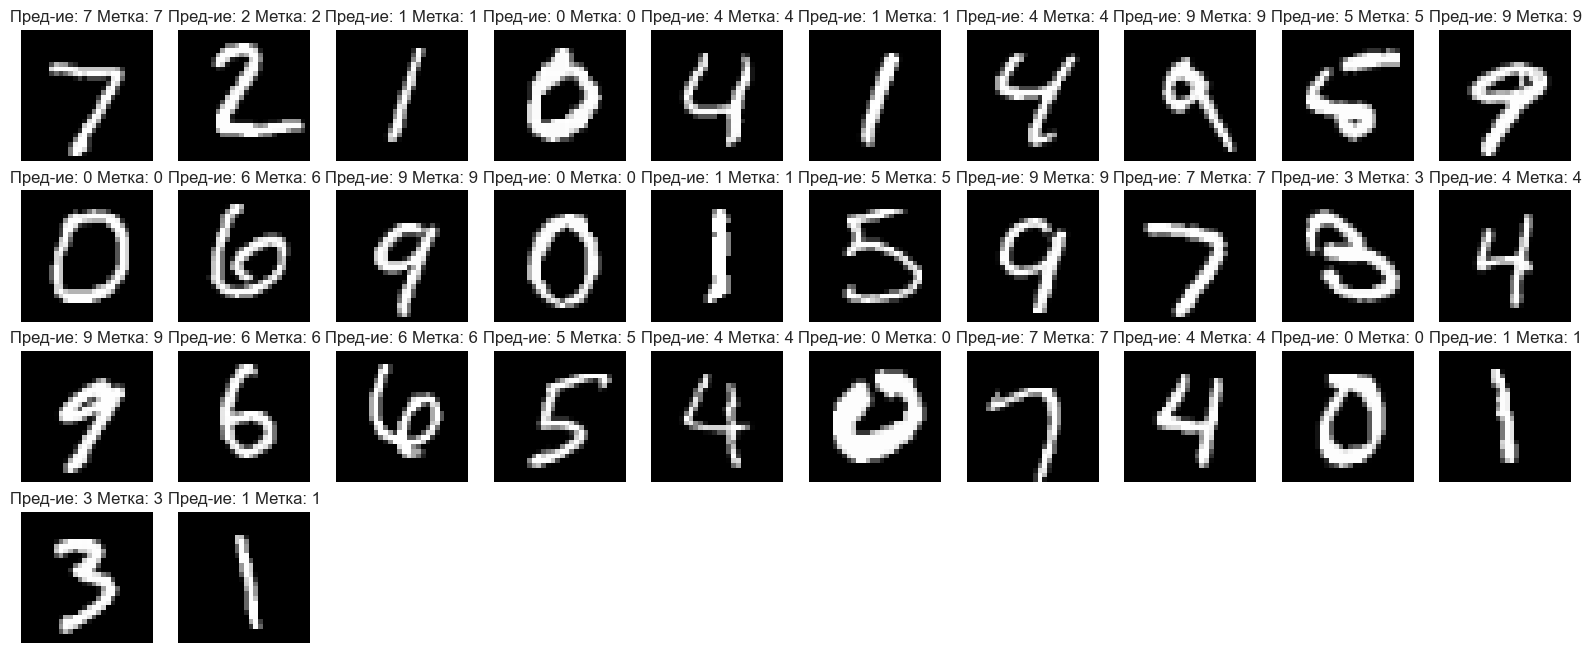

In [34]:
plt.figure(figsize=(20, 8))
for i in range(32):
    img = imgs[i]

    plt.subplot(4, 10, i + 1)
    plt.title(
        "Пред-ие: " + str(digits[i]) + " Метка: " + str(labels[i].numpy())
    )  # predicted and real values
    plt.axis("off")
    plt.imshow(img.numpy(), cmap="gray")

In [39]:
net = model.to('cpu')
y_pred = []
y_true = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        X, y = data
        output = net(X.view(-1, 784))
        y_true += y.tolist()
        y_pred += torch.argmax(output, dim=1).tolist()
        for idx, i in enumerate(output):
             if torch.argmax(i) == y[idx]:
                 correct += 1
             total += 1
print(f'Accuracy: {round(accuracy_score(y_true, y_pred)*100, 2)}%')
print(f'Precision score: {round(precision_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'Recall score: {round(recall_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'f1 score: {round(f1_score(y_true, y_pred, average="macro")*100, 2)}%')

Accuracy: 98.04%
Precision score: 98.06%
Recall score: 98.01%
f1 score: 98.03%


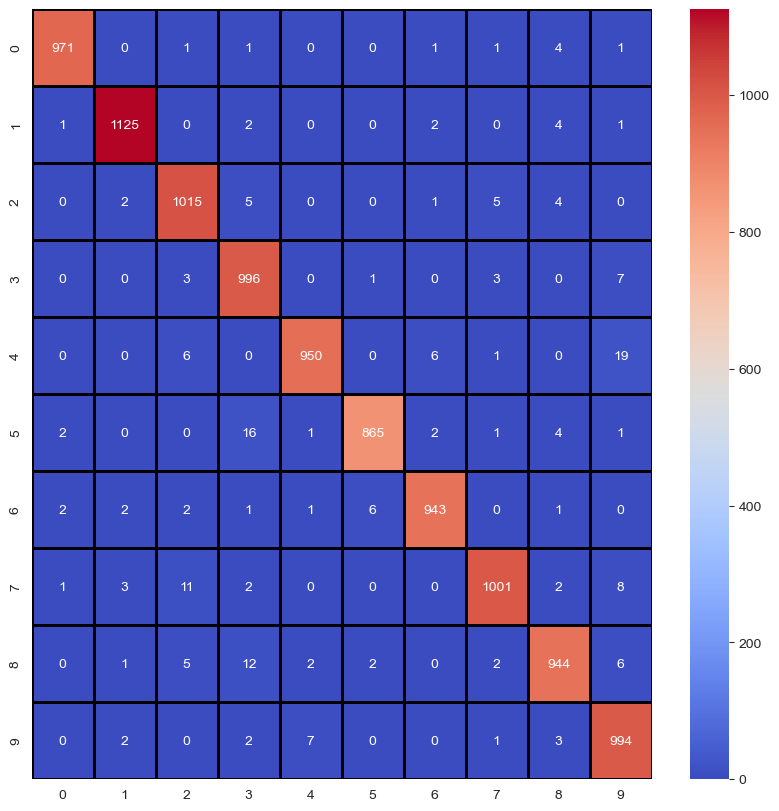

In [40]:
plt.figure(figsize=(10,10))
sb.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='coolwarm', linewidths=2, linecolor='black', fmt=str())
plt.show()

In [41]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Наблюдаем очень хорошие показатели точности для обученной модели.

# Сверточная сеть для MNIST

In [88]:
num_epochs = 20
batch_size = 32
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [89]:
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),  # in channel=1, out=32
            nn.MaxPool2d(2),  # size [32,14,14]
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1),  # in channel=32, out=32
            nn.MaxPool2d(2),  # size [32,7,7]
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 100),  # in = channel*heght*width
            nn.ReLU(),
            nn.Linear(100, 10),
        )

    def forward(self, x):
        x = self.conv_stack(x)
        return x

In [90]:
model = CNN_model().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [91]:
print(model)

CNN_model(
  (conv_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1568, out_features=100, bias=True)
    (8): ReLU()
    (9): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [92]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              ReLU-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           9,248
         MaxPool2d-5             [-1, 32, 7, 7]               0
              ReLU-6             [-1, 32, 7, 7]               0
           Flatten-7                 [-1, 1568]               0
            Linear-8                  [-1, 100]         156,900
              ReLU-9                  [-1, 100]               0
           Linear-10                   [-1, 10]           1,010
Total params: 167,478
Trainable params: 167,478
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.37
Params size (MB): 0.64
Estimated T

Общая рхитектура сверточной нейронной сети представляет собой следующую картинку
![image](archi.png)

В качестве функции активации я взял ReLU, ядро размера 3х3
1) Входное изображение имеет разрешение 28 х 28
2) Затем идет слой из 32 фильтров размера 28 х 28
3) Снижение размерности фильтров до 14 х 14
4) Слой с 32 фильтрами разрешением 14 х 14
5) Снижение размерности фильтров до 7 х 7
6) Слой из 1568 нейронов
7) Слой из 100 нейронов
8) Слой из 10 выходных нейронов

In [93]:
loss_history = {"train": [], "test": []}
start_time = time.time()
cor_test = []
cor_train = []
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)
    cor_test.append(cortest)
    cor_train.append(cortrain)
    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 2.277132
Потери на тестовых данных: 2.229052, Точность модели на тестовых данных: 50.9% 

Эпоха номер 2
Потери обучения: 1.921515
Потери на тестовых данных: 1.191049, Точность модели на тестовых данных: 75.2% 

Эпоха номер 3
Потери обучения: 0.730404
Потери на тестовых данных: 0.494053, Точность модели на тестовых данных: 86.8% 

Эпоха номер 4
Потери обучения: 0.444130
Потери на тестовых данных: 0.384098, Точность модели на тестовых данных: 89.1% 

Эпоха номер 5
Потери обучения: 0.372528
Потери на тестовых данных: 0.337650, Точность модели на тестовых данных: 90.2% 

Эпоха номер 6
Потери обучения: 0.336149
Потери на тестовых данных: 0.311574, Точность модели на тестовых данных: 91.0% 

Эпоха номер 7
Потери обучения: 0.309955
Потери на тестовых данных: 0.284455, Точность модели на тестовых данных: 91.7% 

Эпоха номер 8
Потери обучения: 0.287943
Потери на тестовых данных: 0.264085, Точность модели на тестовых данных: 92.3% 

Эпоха номер 9
Потери обучения: 0

In [94]:
cor_test_g = [x / 10000 for x in cor_test]
cor_train_g = [x / 60000 for x in cor_train]

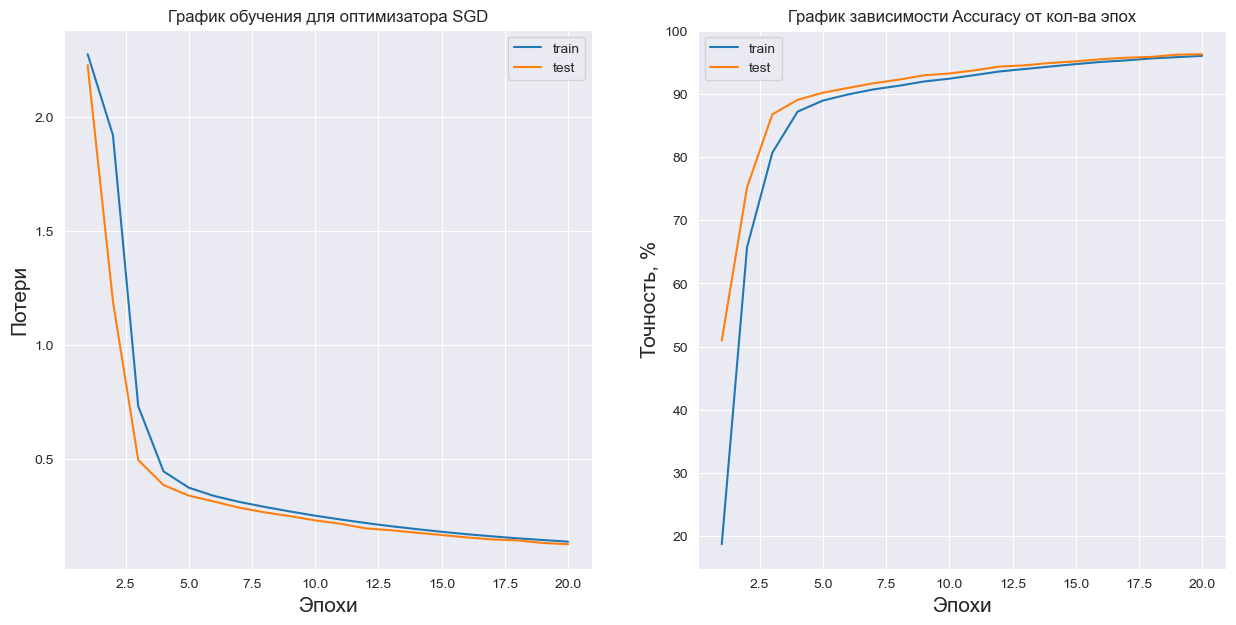

In [95]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График обучения для оптимизатора SGD")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), cor_train_g, label="train")
plt.plot(range(1, num_epochs + 1), cor_test_g, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.grid
plt.show()

In [96]:
net = model.to('cpu')
y_pred = []
y_true = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        X, y = data
        output = net(X)
        y_true += y.tolist()
        y_pred += torch.argmax(output, dim=1).tolist()
        for idx, i in enumerate(output):
             if torch.argmax(i) == y[idx]:
                 correct += 1
             total += 1
print(f'Accuracy: {round(accuracy_score(y_true, y_pred)*100, 2)}%')
print(f'Precision score: {round(precision_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'Recall score: {round(recall_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'f1 score: {round(f1_score(y_true, y_pred, average="macro")*100, 2)}%')

Accuracy: 96.29%
Precision score: 96.27%
Recall score: 96.28%
f1 score: 96.27%


In [140]:
model = CNN_model().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
device = "cuda" if torch.cuda.is_available() else "cpu"
num_epochs = 5

In [141]:
loss_history = {"train": [], "test": []}
start_time = time.time()
cor_test = []
cor_train = []
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)
    cor_test.append(cortest)
    cor_train.append(cortrain)
    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 0.154609
Потери на тестовых данных: 0.047851, Точность модели на тестовых данных: 98.4% 

Эпоха номер 2
Потери обучения: 0.049780
Потери на тестовых данных: 0.038830, Точность модели на тестовых данных: 98.7% 

Эпоха номер 3
Потери обучения: 0.034347
Потери на тестовых данных: 0.034547, Точность модели на тестовых данных: 98.9% 

Эпоха номер 4
Потери обучения: 0.024931
Потери на тестовых данных: 0.028828, Точность модели на тестовых данных: 99.1% 

Эпоха номер 5
Потери обучения: 0.018818
Потери на тестовых данных: 0.028417, Точность модели на тестовых данных: 99.1% 

Обучение завершнео за 5 эпох, затраченное время: 34.944 секунд


In [142]:
cor_test_g = [x / 10000 for x in cor_test]
cor_train_g = [x / 60000 for x in cor_train]

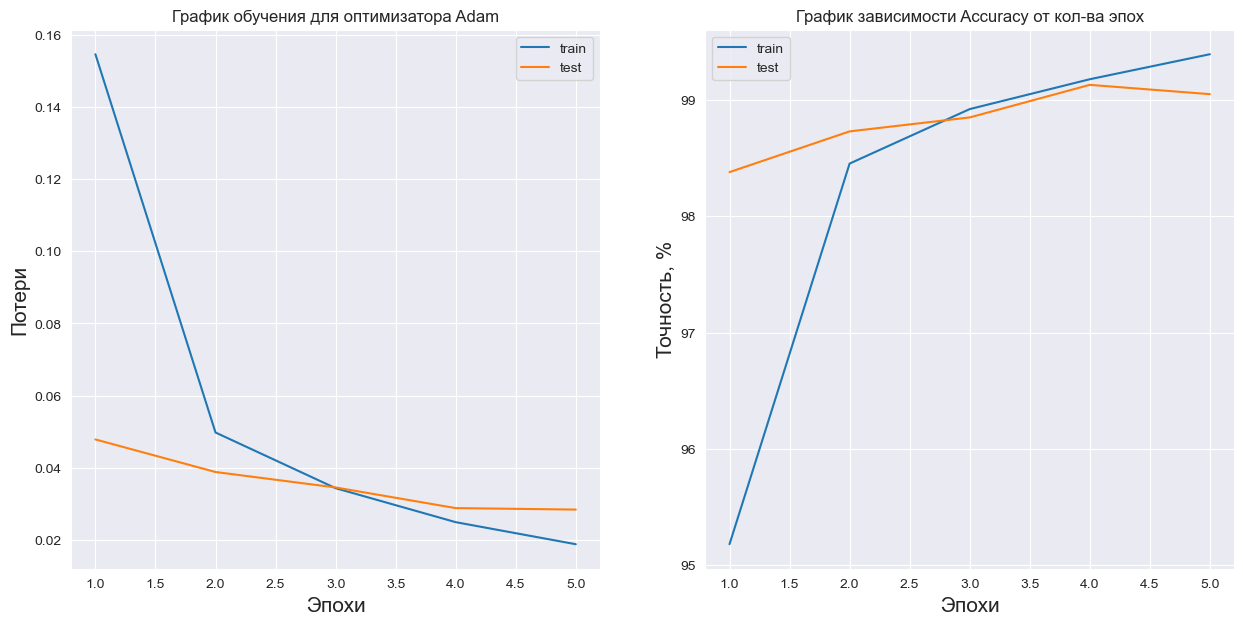

In [143]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График обучения для оптимизатора Adam")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), cor_train_g, label="train")
plt.plot(range(1, num_epochs + 1), cor_test_g, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.grid
plt.show()

In [ ]:
net = model.to('cpu')
y_pred = []
y_true = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        X, y = data
        output = net(X)
        y_true += y.tolist()
        y_pred += torch.argmax(output, dim=1).tolist()
        for idx, i in enumerate(output):
             if torch.argmax(i) == y[idx]:
                 correct += 1
             total += 1
print(f'Accuracy: {round(accuracy_score(y_true, y_pred)*100, 2)}%')
print(f'Precision score: {round(precision_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'Recall score: {round(recall_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'f1 score: {round(f1_score(y_true, y_pred, average="macro")*100, 2)}%')

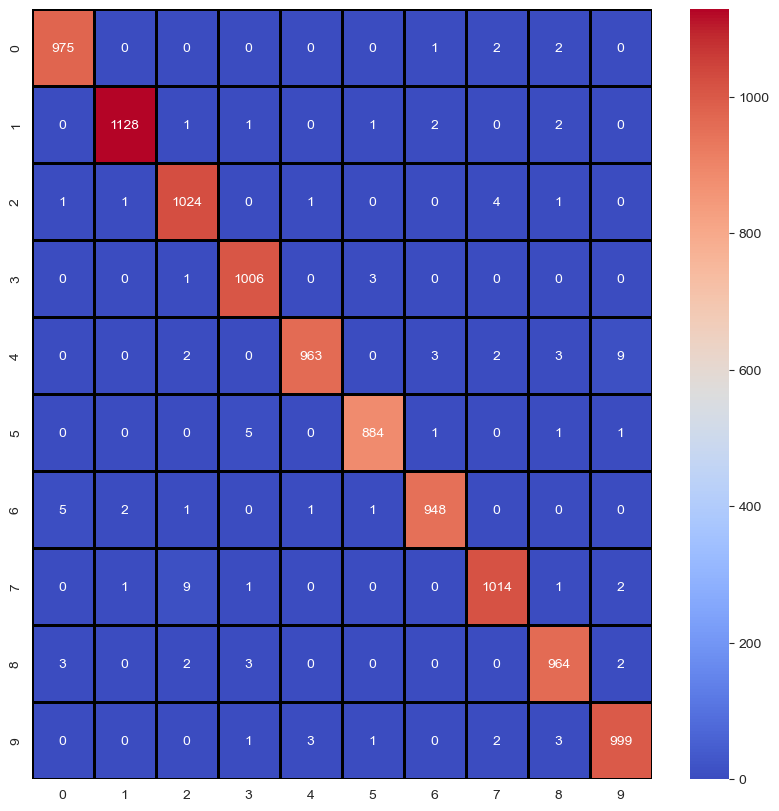

In [104]:
plt.figure(figsize=(10,10))
sb.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='coolwarm', linewidths=2, linecolor='black', fmt=str())
plt.show()

Матрица ошибок показывает нам сколько раз мы предсказали одну цифру как другую, например: мы предсказали 8 как 0 3 раза или 3 как 8 2 раза. По сути матрица ошибок представляют сырую форму всех показателей качества, из которой они могут быть вычислены.

Обе модели имеют отличную точность, но оптимизатор Adam снова показал себя точнее и сократил время обучения и ресурсы.

In [144]:
imgs, labels = next(iter(test_dataloader))
pred = model(imgs.to(device))
imgs = torch.reshape(imgs, (32, 28, 28))
imgs = imgs[:32]
pred = pred[:32].detach()
digits = np.argmax(pred.cpu().numpy(), axis=1)

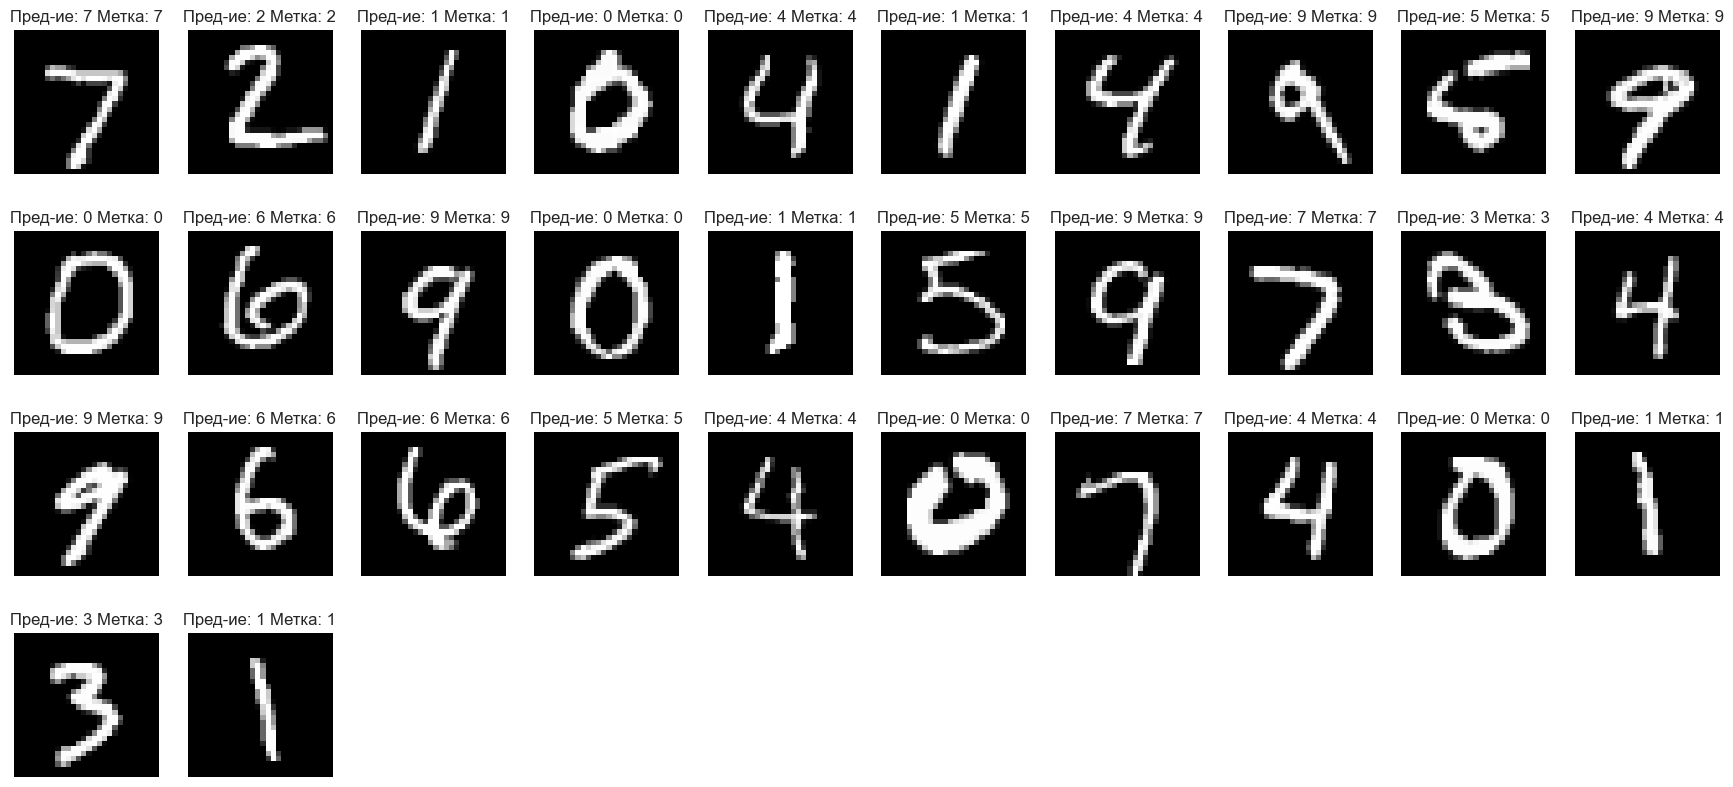

In [147]:
plt.figure(figsize=(22.0, 10.0))
for i in range(32):
    img = imgs[i]

    plt.subplot(4, 10, i + 1)
    plt.title(
        "Пред-ие: " + str(digits[i]) + " Метка: " + str(labels[i].numpy())
    )  # predicted and real values
    plt.axis("off")
    plt.imshow(img.numpy(), cmap="gray")

Как видно выше, сеть безошибочно определила цифры в пределах одного батча.

In [2]:
df = pd.DataFrame({"Структура ИНС":["FCN MLP", "FCN MLP", "Conv. network", "Conv. network"], "Оптимизатор":["SGD","Adam", "SGD", "Adam"],"Test loss":["0,15","0,09","0,12","0,03"], "Accuracy":["95,69%", "98,15%","96,54%","99,05%"], "Precison":["95,65%", "98,16%","96,54%", "99,04%"], "Recall":["95,65%", "98,14%","96.51%", "99,05%"], "f1":["95,65%", "98,15%", "95,51%", "99,04%"], "Кол-во эпох":["60", "7", "20", "5"], "Время обучения, с": ["286.4", "43.6", "111.9", "32.7"]})

In [3]:
print(df.to_markdown(index=False))

| Структура ИНС   | Оптимизатор   | Test loss   | Accuracy   | Precison   | Recall   | f1     |   Кол-во эпох |   Время обучения, с |
|:----------------|:--------------|:------------|:-----------|:-----------|:---------|:-------|--------------:|--------------------:|
| FCN MLP         | SGD           | 0,15        | 95,69%     | 95,65%     | 95,65%   | 95,65% |            60 |               286.4 |
| FCN MLP         | Adam          | 0,09        | 98,15%     | 98,16%     | 98,14%   | 98,15% |             7 |                43.6 |
| Conv. network   | SGD           | 0,12        | 96,54%     | 96,54%     | 96.51%   | 95,51% |            20 |               111.9 |
| Conv. network   | Adam          | 0,03        | 99,05%     | 99,04%     | 99,05%   | 99,04% |             5 |                32.7 |


Для более ясного понимания того, как работает сверточная ИНС, предлагаю отобразить, как выглядят нейроны в сверточной ИНС.

In [127]:
weight_tensor = model.conv_stack[0].weight.data  # extract weights

In [128]:
img_grid = utils.make_grid((weight_tensor + 1) / 2, pad_value=1)

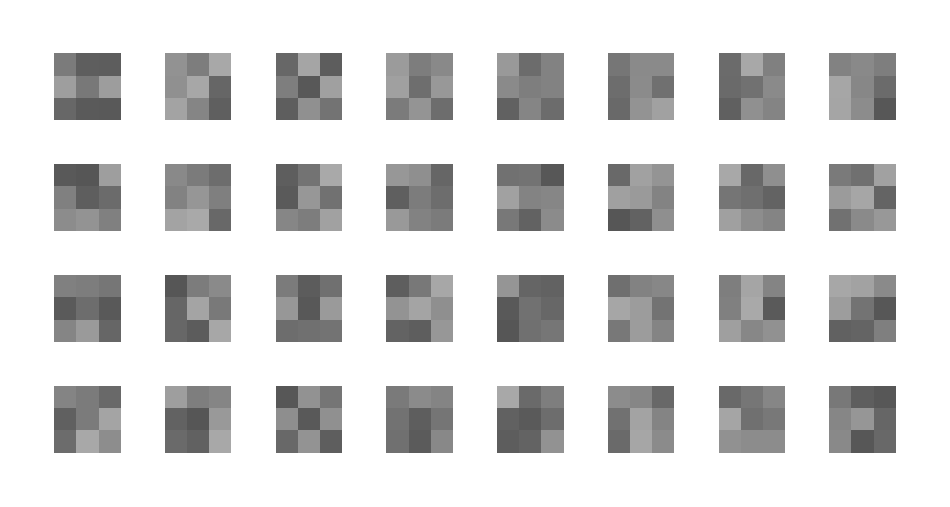

In [129]:
plt.rcParams["figure.figsize"] = (12, 12)
plt.imshow(np.transpose(img_grid, (1, 2, 0)), cmap="gray")
plt.axis("off")
plt.show()

Мы видим 32 фильтра размером 3х3, грубо говоря это и есть наши нейроны. Каждый пиксель несет за собой определенное значение весового коэффициента. Фильтры поочередно накладываются на изображение, и если паттерн фильтра "совпадает" с входной картинкой, то нейрон активируется. Конечно это грубая абстракция того, как обучается сверточная нейронная сеть. Такие фильтры могут иметь разные размеры и цветовые каналы, но в общем, суть похожа на описанный выше алгоритм.

Так как фильтры, из-за своих малых размеров 3х3, на первых слоях сверточных сетей не несут никакой информации для человека, то попробуем визуализировать изображение с выходного слоя многослойного персептрона, в котором будет всего один слой.
Можно сказать что таким образом мы получим обобщенный фильтр, который несет хоть какую-нибудь информацию для человека.

In [17]:
classes = [i for i in range(10)]
class Net_mlp(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 10))

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits


batch_size = 64
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Net_mlp().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def train_loop(dataloader, model, loss_function, optimizer):
    global cortrain
    num_batches = len(dataloader)

    train_loss, corr_train = 0, 0
    cortrain = []

    for imgs, labels in dataloader:
        # предсказание и расчет потерь
        pred = model(imgs.to(device).view(-1, 28 * 28))
        loss = loss_function(pred, labels.to(device))

        # оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        corr_train += (
            (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
        )
    cortrain = corr_train * 100
    train_loss /= num_batches
    print(f"Потери обучения: {train_loss:>8f}")

    return train_loss


def test_loop(dataloader, model, loss_function):
    global cortest
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0
    cortest = []
    with torch.no_grad():
        for imgs, labels in dataloader:
            # Compute prediction and loss
            pred = model(imgs.to(device).view(-1, 28 * 28))
            loss = loss_function(pred, labels.to(device))

            test_loss += loss.item()
            correct += (
                (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
            )
    cortest = correct * 100
    test_loss /= num_batches
    correct /= size
    print(
        f"Потери на тестовых данных: {test_loss:>8f}, Точность модели на тестовых данных: {(100 * correct):>0.1f}% \n")

    return test_loss


loss_history = {"train": [], "test": []}
start_time = time.time()
num_epochs = 7
cor_test = []
cor_train = []
for i in range(num_epochs):
    print(f"Эпоха номер {i + 1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)
    cor_test.append(cortest)
    cor_train.append(cortrain)
    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")


Эпоха номер 1
Потери обучения: 0.543547
Потери на тестовых данных: 0.330032, Точность модели на тестовых данных: 90.8% 

Эпоха номер 2
Потери обучения: 0.323169
Потери на тестовых данных: 0.291897, Точность модели на тестовых данных: 91.7% 

Эпоха номер 3
Потери обучения: 0.294813
Потери на тестовых данных: 0.280710, Точность модели на тестовых данных: 92.2% 

Эпоха номер 4
Потери обучения: 0.281840
Потери на тестовых данных: 0.271689, Точность модели на тестовых данных: 92.5% 

Эпоха номер 5
Потери обучения: 0.273377
Потери на тестовых данных: 0.270791, Точность модели на тестовых данных: 92.6% 

Эпоха номер 6
Потери обучения: 0.267945
Потери на тестовых данных: 0.268053, Точность модели на тестовых данных: 92.7% 

Эпоха номер 7
Потери обучения: 0.263628
Потери на тестовых данных: 0.265178, Точность модели на тестовых данных: 92.7% 

Обучение завершнео за 7 эпох, затраченное время: 22.461 секунд


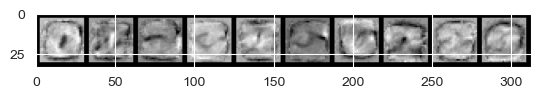

                   0                1                2                3                4                5                6                7                8                9                

[None, None, None, None, None, None, None, None, None, None]

In [21]:
weight_tensor = model.to('cpu').layers_stack[0].weight.data  # extract weights
ims = [i.reshape(1, 28, 28) for i in weight_tensor]
imshow(torchvision.utils.make_grid(ims, nrow=10, padding=3, normalize=True, scale_each=True))
print("                  ", end=' ')
[print(i, end="                ") for i in classes]

Тут мы уже отчетливо можем различить фильтры, с которыми сравниваются входные изображения.
Если сильно обобщать, то можно сказать, что каждая из этих картинок сравнивается с изображением на входе. Каждый пиксель этой картинки имеет определенный вес, и если пиксели на двух изображениях совпадают, то чем больше был вес пикселя, тем больше очков в пользу этого класса засчитает классификатор.